In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine('sqlite:///Resources\hawaii.sqlite')

In [5]:
# reflect an existing database into a new model
## Declare a Base using `automap_base()
Base = automap_base()

# reflect the tables
## Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
# newest Date
newest_date = session.query(func.max(measurement.date)).first()    #order_by(measurement.date).last()
print(f'The most recent date in the database is {newest_date}')

The most recent date in the database is ('2017-08-23',)


In [31]:
earliest_date = session.query(measurement.date).order_by(measurement.date).first()
print(f'The earliest date in the database is {earliest_date}')

The earliest date in the database is ('2010-01-01',)


In [32]:
#dt.date(earliest_date)
year = int(newest_date[0][0:4])
year

2017

In [33]:
month = int(newest_date[0][5:7])
month

8

In [34]:
day = int(newest_date[0][8:])
day

23

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
earliest_date
# Calculate the date one year from the last date in data set.
year_ago = dt.date(year,month,day) - dt.timedelta(days=365)
year_ago




datetime.date(2016, 8, 23)

In [37]:
# Perform a query to retrieve the data and precipitation scores
rain_results = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_ago).\
    order_by(measurement.date).all()

rain_results


[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text major ticklabel objects>)

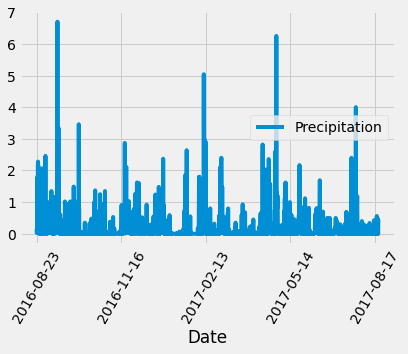

In [73]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(rain_results, columns=['Date', 'Precipitation'])
precipitation_df.set_index('Date', inplace=True)
precipitation_df = precipitation_df.dropna()

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values('Date')
precipitation_df
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot()
plt.xticks(rotation=60)

In [45]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [55]:
type(session.query(func.count(station.station)).all()[0][0])

int

In [47]:
# Design a query to calculate the total number stations in the dataset
locations = session.query(station.station).count()
print(f'There are {locations} stations')

There are 9 stations


In [72]:
session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station)).all()[-1]

('USC00519281', 2772)

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
most_active_station = session.query(station)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
#session.close()